<a href="https://colab.research.google.com/github/mahmud-nobe/CS110_Assignments/blob/master/CS110%20Assignment%203%3A%20Bloom%20Filters/CS110_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [0]:
NAME = "Md Mahmudunnobe"
COLLABORATORS = ""

---


# CS110 Spring 2020 Assignment - Indexing Techniques and Data Structures.


## Overview

 In this assignment, you  will research  Counting Bloom Filters (CBFs), which are data structures that extend the standard Bloom Filters. You will design and implement in Python a set of CBFs initialized at a given false positive rate, and will need to summarize your findings in a report. A report structured has been provided for you in the form of enumerated tasks, which you should follow.
 
 ## Intended Style and Key Audience
 
Your report needs to be written in the style of a chapter from the Cormen textbook (i.e., exhibiting academic rigor and clear explanations) or a Wikipedia page on the subject (i.e., a general overview on a topic that will be peer-reviewed by the world-wide community). Thus, with a beginner’s audience in mind, your report needs to: 

* Carefully explain the concepts of a CBFs, 
* Include details on your CBFs design, 
* Perform an analysis of your implementation and experimental results pertaining to your Python implementation and 
* Perform a critical comparison analysis between the experimental results and the theoretically predicted ones. 
* Use the provided code cells to include all your code, and if these are not enough, please add more cells which you deem necessary.
* Use the same function names provided in the template. 
* Thoroughly describe the algorithmic strategies you are employing in a given question. To do so, feel free to include extra Markdown cells whenever relevant--you may find this [how-to-guide](https://medium.com/analytics-vidhya/the-ultimate-markdown-guide-for-jupyter-notebook-d5e5abf728fd) helpful. 

Make sure you properly cite your sources of information. 

## Notes on the Submission Materials

1. Your **first resource** should be a PDF file created from the Jupyter notebook template provided in these instructions. If your name is “Dumbledore”, your PDF should be named “Dumbledore.pdf”.
2. Your **second resource** must be a single Jupyter Notebook named “Dumbledore.ipynb”. Alternatively, you can also submit a zip file that includes your Jupyter notebook, but please make sure to name it “Dumbledore.zip” (if your name is Dumbledore, the Jupyter notebook submitted as part of such zip file should still be named “Dumbledore.ipynb”!).

## Notes on the Grading Rubrics

* This is a strictly individual assignment. Everything you submit must reflect your own writing and coding. Please do refer to the course guidelines on the syllabus namely in what constitutes plagiarism. 
* All the tasks will be graded on the indicated companion LOs; please make sure to consult their descriptions and rubrics in the course syllabus to maximally align your approach to them. You will not be penalized for not attempting the optional challenge.
* As per the course’s policy on the syllabus, you will need to footnote **at least three HCs** by including a meaningful justification of the application of each HC and how they enabled you to complete part of your work on this assignment. Please refer to [these guidelines](https://docs.google.com/document/d/1s7yOVOtMIaHQdKLeRmZbq1gRqwJKfezBsfru9Q6PcHw/edit) on how to incorporate HCs in your work.

## Report Structured Tasks

### Task 1. [#responsibility] [appropriate LO for the make-up work] 

Take a screenshot of your CS110 dashboard on Forum where the following is visible: 
* your name. 
* your absences for the course have been set to excused up to the end of week 7 (inclusively). Submit this screenshot as a PNG file on your Jupyter notebook. 

![alt text](https://github.com/mahmud-nobe/CS110_Assignments/raw/master/CS110%20Assignment%203:%20Bloom%20Filters/CS110-stat.PNG)

In [0]:
# raise NotImplementedError()

### Task 2.  [#ComputationalSolutions, #DataStructures, #ComplexityAnalysis]  

Write a summary  of the CBFs as an indexing technique, with their underlying data structure and  hashing functionality. This is,  list all the operations they support. For all CBF operations, include an analysis of their asymptotic order growth (complexity analysis). Give a few examples of practical, real-life computational applications that can benefit from using CBFs and carefully justify why. 

#### Introduction






Currently Giuhub has 40 million user and every one of them has their unique id. Now when I want to open an account, every time I chose a user-name, Github has to search through the all available user name to ensure that this user-name is not used before. 

This type is problem is very common in everyday life where we need to check if an item is present in a previously stored list or not. A linear or binary search will take a long time for Github to let me know if the user-name is available or is it already taken. Furthermore, it will take a huge memory to store all 40 million user's unique id with their corresponding key.

This is where bloom filters come in. Bloom filters is a space efficient and probabilistic data structure that can be used to query if an element is present in a list or not.

It takes only m bit space, where m is the number of slot in the bloom filter. It can operate search and insert in constant time. 

But among the limitation, it can give false positive result which means it can say item i is present in the list, where actually it is not. 

Another limitation of standard bloom filter is that we cannot delete any item from the bloom filter. This problem is solved using counting bloom filter. Counting bloom filters have all the advantage of standard bloom filter and in addition it allows the deletion operation in bloom filter. 


#### Standard Bloom Filter

As already mentioned, standard bloom filters are space efficient probabilistic data structure which allows to find the memebership status of an item in a constant time and using relatively small space.

As counting bloom filter is just an extension of bloom filter, it will be useful to have a brief idea on standard bloom filter. 

Some of the properties of standard bloom filter are listed below, we will analyze them further while exploring counting bloom filter.

- Unlike hash table, bloom filter doesn't store a item itself. It use a m number of binary bit, where each bit contains either 0 or 1. It never changes or expands its size. But as more and more new elements are added, the false positive rate increases.
- It initializes by setting the value of the each binary bit as 0 (False). Every time an item is added, it calculates its *hashed value* using k number of hash function. Then changes the corresponding binary bit as 1. If any such slot is already 1, it keeps it unchanged.
- While searching for an item, it again finds its hashed value using the hash functions. Then check if the corresponding slots contain 1 or 0. If all of them contains 1, it returns True, which means **probably present**. But if any such slot is 0, it returns False, which means **definitely not present**.
- This is called probably present, because it is possible that these slots become 1 because of some other elements and the given item is not in the list. This is called the **False Positive**.
- But it never produces **False Negative**. It only says False, when one such slot is 0 and if the element is present it can never be 0.
- It doesn't allow deletion operation. As two or more item can have some common slots, deletion of item will make the value of its all hashed_slot to 0. Which will also delete the information of other items with common slots. This is improved by counting bloom filter, as we will see later.




**Example:**

Suppose we want to make a list of all students who took CS110 with their unique user_name.

Initialization of 10 bit bloom filter:

![alt text](https://github.com/mahmud-nobe/CS110_Assignments/raw/master/CS110%20Assignment%203:%20Bloom%20Filters/bf1.png)

Insert one item named 'Evan' using 3 hash function:

![alt text](https://github.com/mahmud-nobe/CS110_Assignments/raw/master/CS110%20Assignment%203:%20Bloom%20Filters/bf2.png)

Insert another item named 'Haitham' using 3 hash function:
Notice that the index 1 stays 1 as before, it didn't change.

![alt text](https://github.com/mahmud-nobe/CS110_Assignments/raw/master/CS110%20Assignment%203:%20Bloom%20Filters/bf3.png)

An example of false positive:


![alt text](https://github.com/mahmud-nobe/CS110_Assignments/raw/master/CS110%20Assignment%203:%20Bloom%20Filters/bf4.png)

Cesar is not inserted, but as its corresponding hashed_slot are 1 by Evan and Haitham, it shows a false positive.

#### Counting Bloom filter



Counting bloom filter works exactly the same way as the standard bloom filter.

One major difference is instead of a binary bit, each slot is now 4/8/16/32 bit integer. So now, we can store other values instead of only 0 and 1.

#### Initialization




Let's go with the previous example of CS110 students. Now the size of our initialize list is still 10, but each slot can contain more than 0 and 1.

![alt text](https://github.com/mahmud-nobe/CS110_Assignments/raw/master/CS110%20Assignment%203:%20Bloom%20Filters/cbf1.png)

We also need to define the following variables:
- the estimated number of item we want to add, n
- number of hash function we want to use, k.
- Our desired false positive rate.

We need to choose appropriate hash functions. The best hash functions are those that can compute faster and also produce a uniform distribution.


#### Insert Elements

While inserting it, we again calculate their the hashed_value of the item using the hash functions. But this time instead of only putting 1 in the corresponding slot, we increment the value of that slot by 1.

For example, we want to add 'Evan' and we are using 3 hash function: h1, h2 and h3:
- h1(Evan) % 10 = 1
- h2(Evan) % 10 = 4
- h3(Evan) % 10 = 8

![alt text](https://github.com/mahmud-nobe/CS110_Assignments/raw/master/CS110%20Assignment%203:%20Bloom%20Filters/cbf2.png)

Now we want to add 'Haitham' :
- h1(Haitham) % 10 = 1
- h2(Haitham) % 10 = 4
- h3(Haitham) % 10 = 8

![alt text](https://github.com/mahmud-nobe/CS110_Assignments/raw/master/CS110%20Assignment%203:%20Bloom%20Filters/cbf3.png)

Notice that at index 1, we increase the value of the slot to 2 from 1.

So, the psudocode of inserting will be the following assuming we are using k hash function and m is the size of the filter:



```
INSERT(item, k, m):
  For i = 1 to i = k:
    Slot = hi(item) % m
    Increment the value of slot by 1
```

So, for any item, it will run O(k) time. As k is constant for a specific bloom filter, we can say that the complexity of inserting  = O(k) = O(1)



#### *Query* for elemets

To search an item, we will find its hashed_value using the hash functions. Then check each of the hashed slot. If any one of them is 0, return False. Otherwise return True.

The psudocode assuming m = number of slot and k = number of hash function:



```
SEARCH(item, k, m):
  Hashed Slot = []
  For i = 1 to i = k:
    slot = h_i(item) % m
    Append slot to Hashed slot
  
  For i = 1 to i = k:
    check if Hashed slot[i] == 0
    if 0, then return False

  If no slot is 0, return True
```

Here, Each for loop is running for k times and they are not inside of each other.

So, complexity = O(2k) = O(1) [as k is constant for a given filter]


#### Deleting a element

Counting bloom filter allow us to delete element from the list. We can simply find its hashed_value and decrement the corresponding slot by 1.

![alt text](https://github.com/mahmud-nobe/CS110_Assignments/raw/master/CS110%20Assignment%203:%20Bloom%20Filters/cbf4.png)

```
DELETE(item, k, m):
  for i = 1 to i = k:
    slot = h_i(item) % m
    Decrese the value of slot by 1
```

The complexity is again proportional to the number of hash function.

Complexity = O(k) = O(1)



#### False Positive Probability 

As we saw in the bloom filter example, the search result says only that **Probably present** as the hashed_slot can be non-zero by the influence of other elements.

This **False Positive Rate**, *$FPR$* depends upon the number of item to be stored *n*, the number of slots *m* and the number of hash function *k*. 

Their relationship is determined by empirical analysis and they seem to follow the following equations.

For a number of item to be stored, n and the desired false positive rate, FPR,

The memory size, $m = -\frac{n \ln p}{(\ln 2)^2}$, we need to take the rounded integer value of this equation.

Similarly, the optimum number of hash function, $k = \frac{m}{n}\ln2$

In the real life, for a user name list, counting bloom filter is a good choice. It will never say that a user-name doesn't exist when it exist. There is no false negetive. So there will not be any two same user name. It can compute all this operation in O(1).

### Task 3. [#DataStructures, #PythonProgramming, #CodeReadability] 

Implement in Python 3 your designed CBFs data structure and all its operations using the code template below. Make sure you carefully organize your Python code, write meaningful comments (feel free to use [docstrings](https://www.python.org/dev/peps/pep-0257/)), and provide a thorough justification for your choice of hash functions. 

If you decide to use the Python library  `mmh3`,  you will need to provide a thorough explanation of why you have chosen the hashing functions therein. You may also use  `numpy`, `matplotlib`, `random`, `statistics`, and `math`. If you plan to use any other external library not mentioned in this list, you will need to contact your instructor first for validation.

Make sure to strictly follow the honor code as any plagiarism attempt will be referred to the ASC. Please refer to [resource1](https://new.library.arizona.edu/research/citing/plagiarism) and [resource2](https://poorvucenter.yale.edu/writing/using-sources/understanding-and-avoiding-plagiarism/what-plagiarism), which specify what constitutes plagiarism. 

Demonstrate how your code works by inserting a list of words in [Shakespeare’s works](https://ocw.mit.edu/ans7870/6/6.006/s08/lecturenotes/files/t8.shakespeare.txt). The following lines of code will create such a list of words in Python:

```python
txt_file = open("t8.shakespeare.txt", "r")

entries = txt_file.read().split(' ')
lines = [string.replace('\n', '') for string in entries]
all_text = [line for line in lines if line != '']
```

Feel free to use another interesting dataset for further validation, but this is optional.

In [23]:
# import necessary packages

!pip install mmh3
import mmh3
import hashlib

import numpy as np
import time
import math

In [24]:
# reading the words from the shakespeare file

txt_file = open("t8.shakespeare.txt", "r")
 
entries = txt_file.read().split(' ')
lines = [string.replace('\n', '') for string in entries]
all_text = [line for line in lines if line != '']
len(all_text)

896183

Two very important criterias for a good hash function are the following
- Its hashing time should be fast as we will call it again and again while inserting or deleting a new element as well as searching. So if it is slow, it will decrease the overall  efficiency of the algorithm.

- The output of the hash function should be uniformly distributed. When the distribution is uniform, its equally likely for a given item to hash in any item in the hash table. Uniform distribution ensure less collision and improve the overall efficiency

We will compare the hash functions of mmh3 and hashlib packages based on these two properties to understand which will be a good hash function to use in our algorithm.

In [0]:
######
# Thesting the efficiency (hashing time and distribution of hashed value) of different hash functions  
######

# lists for storing hashed values
hashlib1 = []
hashlib2 = []
hashlib3 = []

mmh3_1 = []
mmh3_2 = []
mmh3_3 = []

# for storing the hashed computed time
time_hashlib1 = 0
time_hashlib2 = 0
time_hashlib3 = 0

time_mmh3_1 = 0
time_mmh3_2 = 0
time_mmh3_3 = 0

# slot size in hash table
num_slot = 2000

for word in all_text:
  
  ### hashlib package: 

  # 1st hash functions from hashlib: algorthim: sha3_256
  start = time.time() 
  # encode the word, then use the algorithm to get a hash_value,
  # digest it as hexadecimal value, then transform to integer and 
  # then take the mode of num_slot
  hash_value = int(hashlib.sha3_256(word.encode()).hexdigest(), 16) % num_slot
  end = time.time()

  # appending the hash_value in corresponding list
  # and increment the corresponding hashing time
  hashlib1.append(hash_value)
  time_hashlib1 += end - start

  # 2nd hash functions from hashlib: algorthim: sha3_384
  start = time.time() 
  hash_value = int(hashlib.sha3_384(word.encode()).hexdigest(), 16) % num_slot
  end = time.time()

  # appending the hash_value in corresponding list
  # and increment the corresponding hashing time
  hashlib2.append(hash_value)
  time_hashlib2 += end - start

  # 3rd hash functions from hashlib: algorthim: sha3_512
  start = time.time() 
  hash_value = int(hashlib.sha3_512(word.encode()).hexdigest(), 16) % num_slot
  end = time.time()

  # appending the hash_value in corresponding list
  # and increment the corresponding hashing time
  hashlib3.append(hash_value)
  time_hashlib3 += end - start

  ### mmh3 package

  # 1st hash functions from mmh3 with seed = 200
  start = time.time() 
  # hashed the word using a specific seed and then take the mode of num_slot
  hash_value = mmh3.hash(word, seed = 200) % num_slot
  end = time.time()

  # appending the hash_value in corresponding list
  # and increment the corresponding hashing time
  mmh3_1.append(hash_value)
  time_mmh3_1 += end - start

  # 2nd hash functions from mmh3 with seed = 300
  start = time.time() 
  hash_value = mmh3.hash(word, seed = 300) % num_slot
  end = time.time()

  # appending the hash_value in corresponding list
  # and increment the corresponding hashing time
  mmh3_2.append(hash_value)
  time_mmh3_2 += end - start

  # 3rd hash functions from mmh3 with seed = 400
  start = time.time() 
  hash_value = mmh3.hash(word, seed = 400) % num_slot
  end = time.time()

  # appending the hash_value in corresponding list
  # and increment the corresponding hashing time
  mmh3_3.append(hash_value)
  time_mmh3_3 += end - start

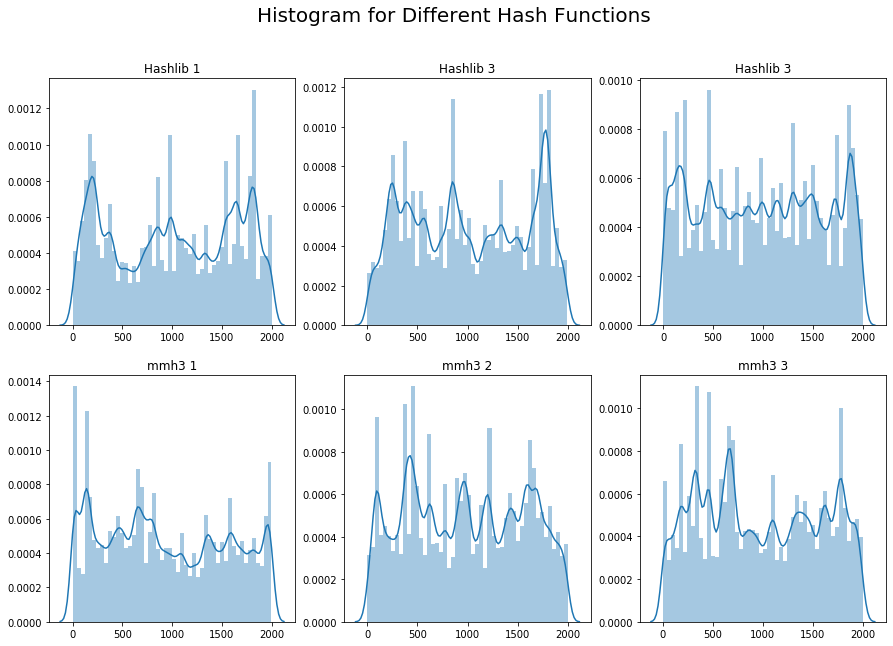

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

### plotting and analyzing the Histogram

# create subplots
fig, ax =  plt.subplots(2,3, figsize = (15,10))

# title
fig.suptitle('Histogram for Different Hash Functions', fontsize = 20)

# plot histogram and set the corresponding titles 
sns.distplot(hashlib1, ax = ax[0][0])
ax[0][0].set_title('Hashlib 1')

sns.distplot(hashlib2, ax = ax[0][1])
ax[0][1].set_title('Hashlib 3')

sns.distplot(hashlib3, ax = ax[0][2])
ax[0][2].set_title('Hashlib 3')

sns.distplot(mmh3_1, ax = ax[1][0])
ax[1][0].set_title('mmh3 1')

sns.distplot(mmh3_2, ax = ax[1][1])
ax[1][1].set_title('mmh3 2')

sns.distplot(mmh3_3, ax = ax[1][2])
ax[1][2].set_title('mmh3 3')

plt.show()

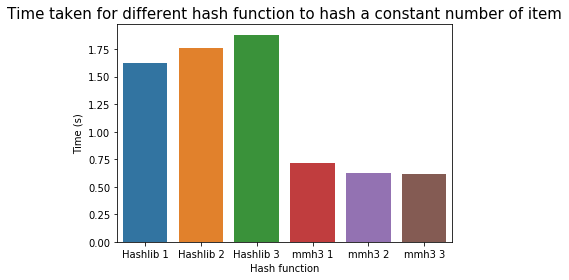

In [27]:
# Now plotting the hashing time for each hash functions

sns.barplot(['Hashlib 1', 'Hashlib 2', 'Hashlib 3', 'mmh3 1', 'mmh3 2', 'mmh3 3'],
        [time_hashlib1, time_hashlib2, time_hashlib3, 
         time_mmh3_1, time_mmh3_2, time_mmh3_3])
plt.title('Time taken for different hash function to hash a constant number of item', fontsize = 15)
plt.ylabel('Time (s)')
plt.xlabel('Hash function')
plt.show()

Hash function from both packages show almost uniform distribution but the hashing time for mmh3 packages are way more smaller (about half of hashlib). So it will be more efficient to use the function from mmh3 packages.


In [0]:
# Feel free to define additional classes that you think are helpful 
# in building this class of CountingBloomFilter 

import numpy as np
# import mmh3

class CountingBloomFilter(object):
    """Implement the counting bloom filter which supports:
    - search: queries the membership of an element
    - insert: inserts a string to the filter
    - delete: removes a string from the filter 
    
    Feel free to define any helpful additional methods.
    """
    def __init__(self, num_item, fpr):
        """
        Initial parameter:
        - fpr: float, false positive rate
        - num_item: int, number of items stored
        
        For example, if you choose fpr and memory_size, edit your __init__ to
        `def __init__(self, memory_size, fpr)`
        """
        # false positive rate
        self.fpr = fpr

        # number of item
        self.num_item = num_item

        # memory size
        self.memory_size = -1*int(round( (self.num_item * math.log(self.fpr)) / (math.log(2)**2) ))
        
        # initialize an empty numpy array as our bloom filter
        self.hash_table = np.zeros(self.memory_size)

        # number of hash functions
        self.num_hashfn = int(round((self.memory_size/self.num_item) * math.log(2)))

        if(self.num_hashfn == 0):
          self.num_hashfn = 1
    
    def hash_cbf(self, item):
        """
        Returns hash values of an item
        input:
          a str as an item
        output:
          a list of the hashed_slot for that item 
        """
        # empty array for storing the hashed slots
        hashed_slots = []

        start = time.time()
        # calculate the slot using num_hashfn number of hash functions
        # it used murmur hash function from mmh3 package and 
        # ith hash function use i*5 as its seed
        for num in range(self.num_hashfn):
          slot = mmh3.hash(item, seed = 5*num) % self.memory_size
          hashed_slots.append(slot)

        end = time.time()
        self.hashing_time = end - start
        # keep track of hashing time

        return hashed_slots
    
    def search(self, item):
        """
        Checks if an item is present in the hash table or not.
        Input:
          an item to search for
        Output:
          True: if it is probably present
          False: if it not present
        """

        hashed_slots = self.hash_cbf(item)

        # check for every hashed_slot for that item
        # if any of the slot is 0, return False
        for slot in hashed_slots:
          if (self.hash_table[slot] == 0):
            return False
        
        # if no slot contains 0, returns True
        return True
    
    def insert(self, item):
        """
        Inserts an element to the list by increment the value of corresponding 
        hashed slot
        """
        # find the hashed_slot and increase them by 1
        hashed_slots = self.hash_cbf(item)

        for slot in hashed_slots:
          self.hash_table[slot] += 1

        return self
    
    def delete(self, item):
        """
        Delete an element by decresing the value of corresponding 
        hashed slot
        """
        # if the item is present, find its hashed_slot
        if (search(self, item)):
          hashed_slots = self.hash_cbf(item)

          # decrese them by 1
          for slot in hashed_slots:
            self.hash_table[slot] -= 1
        # else show an error
        else:
          KeyError('{} not found in counting_bloom_filter'.format(item))
        
        return self


In [192]:
# testing using the given data

num_item = 20000
fpr = 0.1

# creating our filter
CBFs = CountingBloomFilter(num_item, fpr)

np.random.shuffle(all_text)

# add first num_item in the filter, else are absent
present = all_text[:num_item]
absent = all_text[num_item:]

np.random.shuffle(present)
np.random.shuffle(absent)

for word in present:
  CBFs.insert(word)

# check for true and false positive
true_positive = 0
false_positive = 0

# if the search says True but not in the present increase the false positive count
# else increase true positive
for word in all_text:
  is_found = CBFs.search(word)

  if (is_found):
    if (word not in present):
      false_positive += 1 
    else:
      true_positive += 1

# fpr = false_positive/(total_positive)
total_positive = false_positive + true_positive
fpr = false_positive/(total_positive)
print('True Positive, False Positive, False Positive Rate:',true_positive, false_positive, fpr)

True Positive, False Positive, False Positive Rate: 694436 1268 0.0018226142152409646


### Task 4 [#ComplexityAnalysis, #ComputationalCritique].

Now you will verify the effectiveness of your CBF implementation by testing how well the implementation matches or diverges from the theoretical findings. The following tasks will help you make this computational analysis. Explicitly include any assumptions you have made to arrive at your results. If there are any discrepancies between the theory and the computational experiments, provide an explanation for these.

1. [#DataStructures] Create several CBFs (at least 10) for different FPRs, and evaluate how the memory size scales with the FPR. 
2. [#DataStructures] How does the memory size scale with the number of items stored, for a fixed FPR?
3. [#DataStructures, #ComplexityAnalysis] How does the actual FPR scale with the number of hash functions?
4. [#DataStructures, #ComplexityAnalysis] How does the access time to hashed values scale with the number of items stored in a CBF kept at constant FPR?


#### Preparing the data for experimental analysis

In [0]:
# create 20 different fprs and 10 num_item for each fpr
FPRs = np.linspace(0.01, 0.8, 20)
num_items = np.linspace(200, 2000, 10).astype('int32')

# list for storing our variable of interest
memory_sizes = []
num_hash_function = []
actual_FPR = []
total_hashing_times = []

# create CBF for each pair of fpr and num_item
for fpr in FPRs:
  for num_item in num_items:
    CBFs = CountingBloomFilter(num_item, fpr)
    # append the memory_size and k
    memory_sizes.append(CBFs.memory_size)
    num_hash_function.append(CBFs.num_hashfn)

    np.random.shuffle(all_text)

    # first num_item of words are taken for adding 
    # next (2*num_item) number of words are for checking purpose (not present in the list)
    present = all_text[:num_item]
    absent = all_text[num_item:int(3*num_item)]

    # for each CBF, while inserting the words count the total hashing time
    hashing_time = 0
    for word in present:
      CBFs.insert(word)
      hashing_time += CBFs.hashing_time
    
    total_hashing_times.append(hashing_time) 

    test_words = present + absent
    np.random.shuffle(test_words)

    true_positive = 0
    false_positive = 0

    
    # if the search says True but not in the present increase the false positive count
    # else increase true positive    
    for word in test_words:
      is_found = CBFs.search(word)

      if (is_found):
        if (word not in present):
          false_positive += 1 
        else:
          true_positive += 1

    total_positive = false_positive + true_positive
    # append the actual fpr
    actual_FPR.append(false_positive/total_positive)


In [193]:
 # insert all collected values in a dictionary
 # and creating a pandas dataframe
 plotting_data = dict({'FPRs':FPRs.repeat(len(num_items)),
                      'num_item': np.tile(num_items, len(FPRs)),
                      'memory_size': memory_sizes,
                      'num_hash_function': num_hash_function,
                      'actual FPR': actual_FPR,
                      'total_hashing_times': total_hashing_times})

import pandas as pd
plotting_data = pd.DataFrame(plotting_data)
plotting_data.head(10)

,FPRs,num_item,memory_size,num_hash_function,actual FPR,total_hashing_times
0,0.01,200,1917,7,0.000000,0.000994
1,0.01,400,3834,7,0.000000,0.002120
2,0.01,600,5751,7,0.000000,0.002996
3,0.01,800,7668,7,0.002548,0.003703
4,0.01,1000,9585,7,0.001996,0.005011
5,0.01,1200,11502,7,0.000402,0.005693
6,0.01,1400,13419,7,0.000696,0.006942
7,0.01,1600,15336,7,0.000301,0.007806
8,0.01,1800,17253,7,0.000000,0.008666
9,0.01,2000,19170,7,0.000000,0.009392


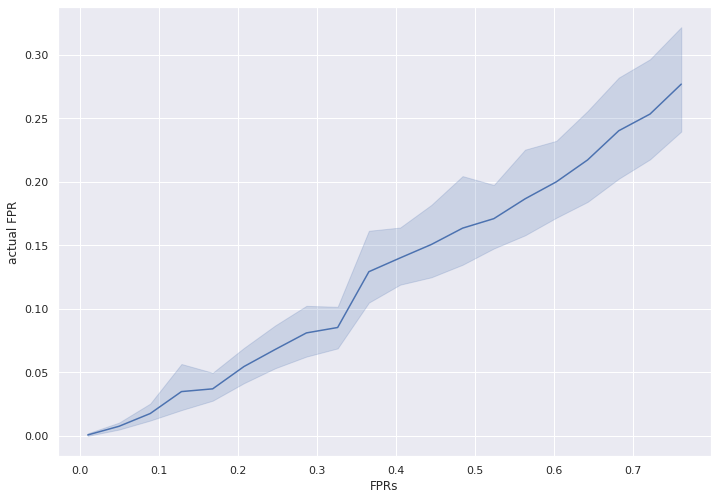

In [180]:
#### Cheking how actual FPR relates with given desired FPRs

sns.lineplot(x = 'FPRs', y='actual FPR', data=plotting_data)
plt.show()

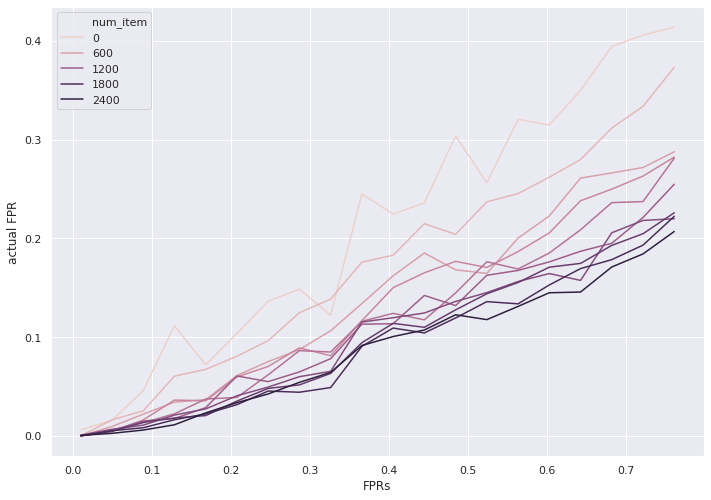

In [182]:
# actual FPR vs given desired FPRs for a constant num_item

sns.lineplot(x = 'FPRs', y='actual FPR', hue='num_item', data=plotting_data)
plt.show()

We can see a nice correlation between desired fpr given as input and the actual fpr. They are linearly scales with one another. The slope of the linear realtion depends on the numbr of item to be added. 

Also the actual fpr is almost always smaller than the given desired fpr.

#### how memory size scales with the FPR for a constant num_item

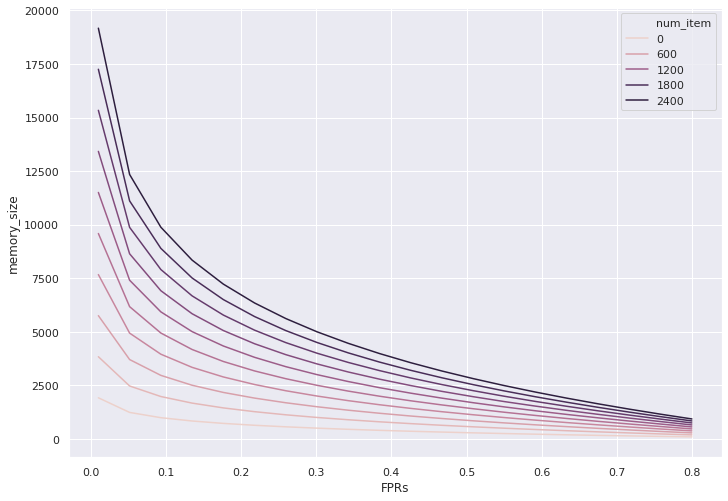

In [194]:
### theoritical analysis
# With given FPRs, using empirical formula
# here the memory size is computed using the equation
# so this is a visual representation of the theoritical analysis

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(x = 'FPRs', y='memory_size', hue='num_item', data=plotting_data)
plt.show()

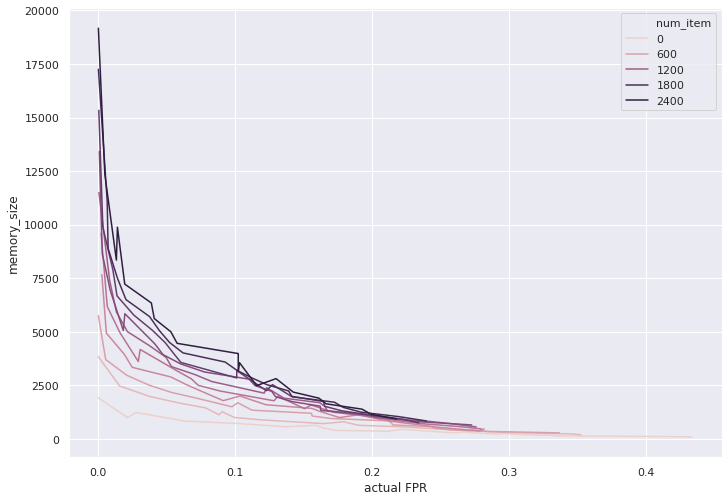

In [195]:
#### Experimental analysis
# With actual FPR from the experiment

sns.lineplot(x = 'actual FPR', y='memory_size', hue='num_item', data=plotting_data)
plt.show()

The experiment matches with the theoritical analysis. The memory size is decays exprimentally as our fpr is increasing. As the number of item increase the decay rate become smaller.

It means the less we are concerned about the false positive, the less we can make our memory size.

#### How memory size scale with the number of items stored, for a fixed FPR

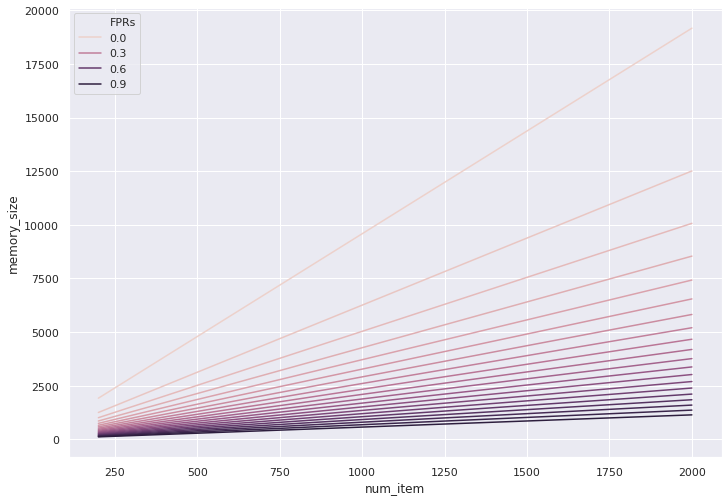

In [150]:
## the given fpr is fix in each line
sns.lineplot(x = 'num_item', y='memory_size', hue='FPRs', data=plotting_data)
plt.show()

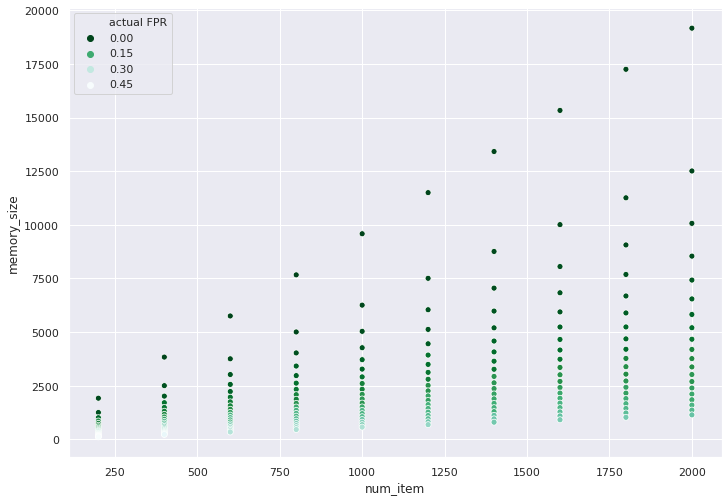

In [184]:
# scatterplot using the actual fpr rate as hue
sns.scatterplot(x = 'num_item', y='memory_size', hue='actual FPR', palette = 'BuGn_r', data=plotting_data)
plt.show()

As expected, the memory size in increasing as the number of item is increasing. The slop is smaller for larger FPR. So if we want to smaller fpr, the increase of memory size related to the increase of num_item will be in much larger speed.

#### How does the actual FPR scale with the number of hash functions for a constant num_item

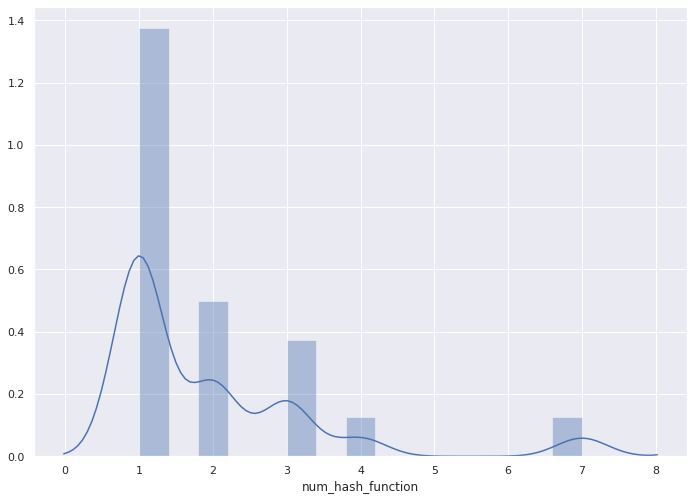

In [159]:
# First let's check how the number of hash function is distributed

sns.distplot(num_hash_function)
plt.xlabel('num_hash_function')
plt.show()

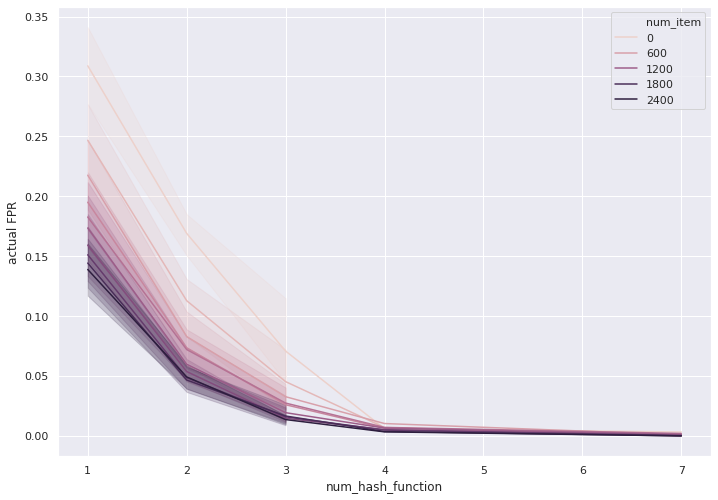

In [160]:
# Experimental Analysis to check how actual FRP scales with hash function
sns.lineplot('num_hash_function', 'actual FPR', hue = 'num_item', data=plotting_data)
plt.show()

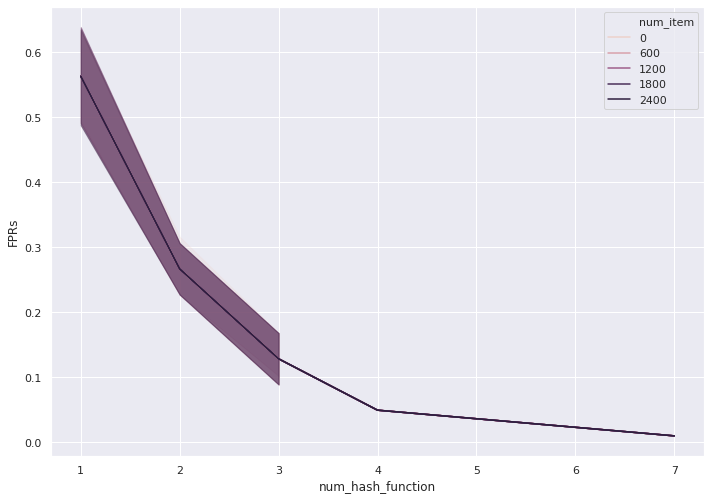

In [164]:
# Using the given fpr

sns.lineplot('num_hash_function', 'FPRs', hue = 'num_item', data=plotting_data)
plt.show()

We can see as our hash function number increases, the actual fpr is decresing exponentially. 

#### How does the access time to hashed values scale with the number of items stored in a CBF kept at constant FPR.

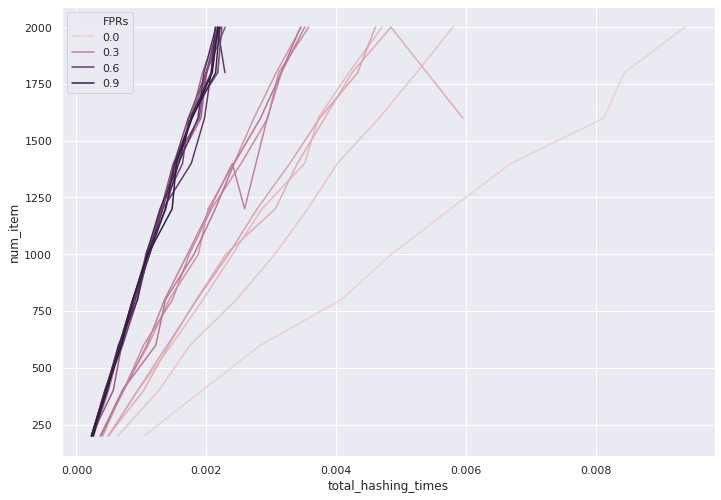

In [171]:
## Using total hashing_time 
sns.lineplot('total_hashing_times', 'num_item', hue = 'FPRs', data=plotting_data)
plt.show()

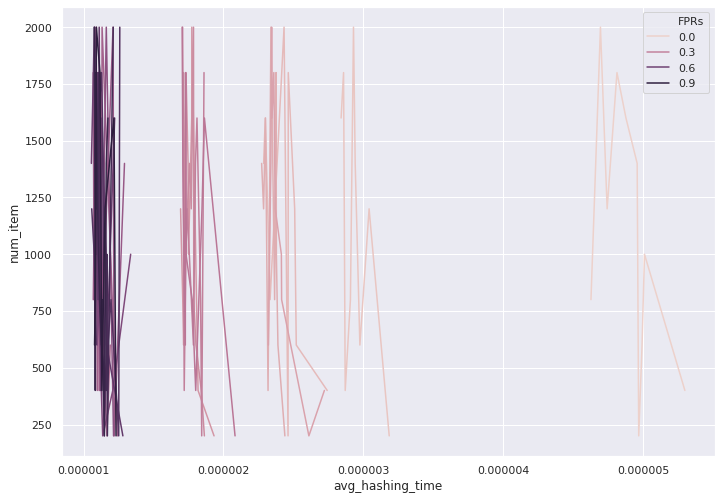

In [196]:
## Using average hashing_time 
sns.lineplot(plotting_data['total_hashing_times']/plotting_data['num_item'], plotting_data['num_item'], hue = 'FPRs', data=plotting_data)
plt.xlabel('avg_hashing_time')
plt.show()

Avg hashing time is constant for any change in num_item. It proves the complexity of O(1). No matter how much data we want to add, the hashing time is always constant.

But the avg hashing time larger for smaller fpr, as we want more accuracy, the speed decreases a bit.


### Task 5. [#ComputationalCritique]

Identify and list (if any) corner cases for CBFs. Explain why these cases should be taken into account if you are a software engineer.


- When false positive is not accepted: Suppose we want to find which houses still do not have the electricity in a given region. If we use CBF for querying for each of our house of intereste, some house will be called present while they are not. Using CBF in that case will result in no electricity for the houses.
- Limited Scalability: As the CBF cannot be extended we need to know earlier the expected number of input to estimate a good memory size. Once the limit is over, we will only have false psoitve and it will not work anymore.
- Arithmetic Overflow: We need to choose the bit size according to the expected number of element that could take the same slot. If it is overflow, then the analysis will be incorrect. We can consider that while inserting or deleting by cheking the current value before increase it anymore.

**Reference:**

Alsayed, K. (2020). What are Counting Bloom Filters? — Python Implementation. Retrievedfrom https://medium.com/analytics-vidhya/cbfs-44c66b1b4a78


Appleby, A. (2020). mmh3. Retrieved 7 March 2020, from https://pypi.org/project/mmh3/


Bloom filter. (2020). Retrieved from https://en.wikipedia.org/wiki/Bloom_filter#Counting_Bloom_filters


Bonomi F., Mitzenmacher M., Panigrahy R., Singh S., Varghese G. (2006) An Improved Construction for Counting Bloom Filters. In: Azar Y., Erlebach T. (eds) Algorithms – ESA 2006. ESA 2006. Lecture Notes in Computer Science, vol 4168. Springer, Berlin, Heidelberg


Hashing | Set 1 (Introduction). (2020). Retrieved from https://www.geeksforgeeks.org/hashing-set-1-introduction/


Kumar, A. (2020). Bloom Filters - Introduction and Python Implementation - GeeksforGeeks. Retrieved from https://www.geeksforgeeks.org/bloom-filters-introduction-and-python-implementation/

**HC Index:**

.#medium: I use different medium to explain the bloom filter and counting bloom filter. Other than the use of simple writing, I used illustration, then pseudocode, detailed commented python code and lastly proper visualization to understand the complexity.

.#organization: I added a hook at the very first paragraph by telling the story of Github to connect with the audience and give them clear idea about what is bloom filter. The comments, graph everything is formatted properly with proper color.

.#breakitdown: I break down and explain each function at the first task. Then for computational analysis, I break the questions one by one and explain well each of them and build upon that.
